In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import bbox_visualizer as bbv
import matplotlib.pyplot as plt
from PIL import __version__ as PILLOW_VERSION
from torchvision import datasets
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
import bbox_visualizer as bbv
import shutil
import torch

In [2]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)

#model = torch.hub.load('C:/projects/cvor1/yolov5_ws/yolov5', 'yolov5s', weights='yolov5_ws/yolov5/runs/train/exp5/weights/best.pt')  # yolov5n - yolov5x6 or custom
model_name='yolov5_ws/yolov5/runs/train/exp5/weights/best.pt'
model = torch.hub.load('yolov5_ws/yolov5', 'custom', source='local', path = model_name, force_reload = True)


YOLOv5  2022-12-24 Python-3.9.13 torch-1.13.0 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7031701 parameters, 0 gradients
Adding AutoShape... 


In [54]:
im = 'data/raw/images/test/P016_tissue1_144.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im) # inference
predictions = results.pandas().xyxy[0]  # or .show(), .save(), .crop(), .pandas(), etc.
print(results.names)

{0: 'Right_Scissors', 1: 'Left_Scissors', 2: 'Right_Needle_driver', 3: 'Left_Needle_driver', 4: 'Right_Forceps', 5: 'Left_Forceps', 6: 'Right_Empty', 7: 'Left_Empty'}


In [4]:
for index, row in predictions.iterrows():
    print(row.tolist())

[430.73919677734375, 190.76731872558594, 524.8163452148438, 327.95318603515625, 0.9276059865951538, 7, 'Left_Empty']
[5.719005584716797, 173.63900756835938, 104.82478332519531, 362.3869934082031, 0.8497007489204407, 2, 'Right_Needle_driver']


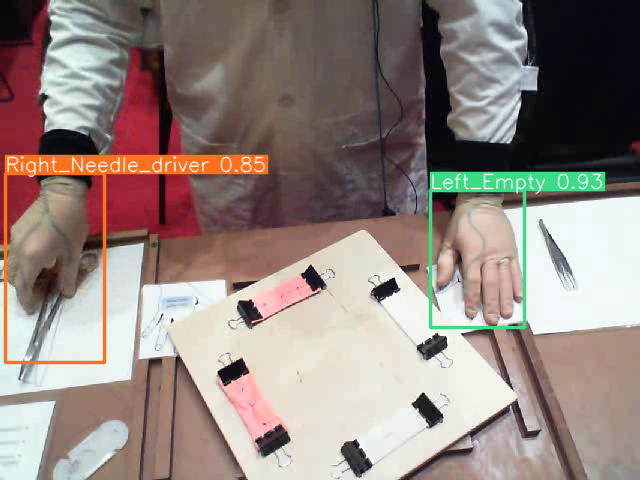

In [5]:
results.show()

In [55]:
def findMostViews(views, catagories):
    counts = []
    for  c in catagories:
        counts.append(views.count(c))
    return catagories[np.argmax(counts)]

## https://learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/      ## basic opencv tutorial
## https://github.com/shoumikchow/bbox-visualizer  ## bbox_visualizer git with examples
K = 15

videoPath = 'data/raw/videos/P022_balloon1.wmv'
outName = videoPath.split("/")[-1]
outName = outName.split(".")[0]
cap = cv.VideoCapture(videoPath)

right_labels = []
left_labels = []

right_k_labels = []
left_k_labels = []
for j in range(0,K):
    right_k_labels.append(6)
    left_k_labels.append(7)


# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter(outName + '.mp4',fourcc, 30.0, (640,480))

# Check if camera opened successfully
if (cap.isOpened() == False):
    print("Error opening video stream or file")

# Read until video is completed
i=0
while (cap.isOpened()):
    i += 1
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:

        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

        results = model(frame)
        #print(results.xyxy)

        # add bounding boxes
        # bbox = [xmin, ymin, xmax, ymax]
        results_xyxy = results.xyxy[0].tolist()
        labels = []
        boxes = []
        for res in results_xyxy:
            labels.append(results.names[int(res[5])])
            boxes.append([int(a) for a in res[0:4]])
            if int(res[5])%2 == 0:
                right_k_labels.append(int(res[5]))
                del right_k_labels[0]
                right_labels.append(findMostViews(right_k_labels, list(results.names.keys())))
            else:
                left_k_labels.append(int(res[5]))
                del left_k_labels[0]
                left_labels.append(findMostViews(left_k_labels, list(results.names.keys())))



        frame = cv.cvtColor(frame, cv.COLOR_RGB2BGR)

        frame = bbv.draw_multiple_rectangles(frame, boxes,bbox_color=(255,0,0))
        frame = bbv.add_multiple_labels(frame, labels, boxes,text_bg_color=(255,0,0))

        font = cv.FONT_HERSHEY_SIMPLEX
        cv.putText(frame,results.names[right_labels[-1]] +" " + results.names[left_labels[-1]],(50,50), font, 1, (0,255,255), 2, cv.LINE_4)

        # Display the resulting frame
        cv.imshow('Frame', frame)

        # write the frame
        out.write(frame)



        # Press Q on keyboard to  exit
        if cv.waitKey(33) & 0xFF == ord('q'):
            break

    # Break the loop
    else:
        break

# When everything done, release the video capture object
cap.release()
out.release()

# Closes all the frames
cv.destroyAllWindows()

In [26]:
image = cv.cvtColor(frames[0], cv.COLOR_BGR2RGB)
img = Image.fromarray(image, 'RGB')
#img.save('my.png')
#img.show()

results = model(image)

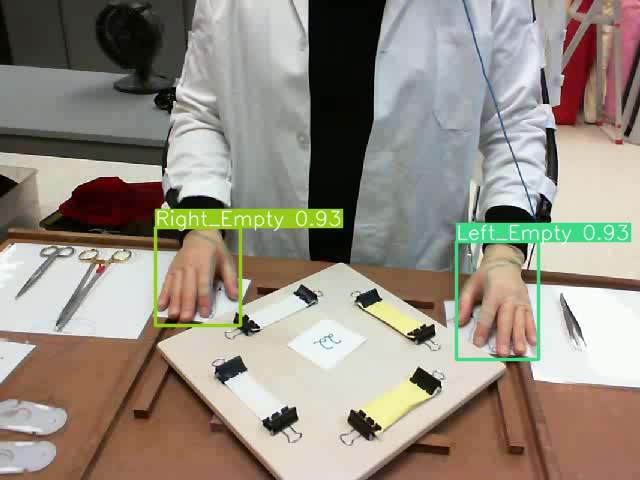

In [27]:
results.show()

In [10]:
results.xywhn[0]

tensor([[0.77736, 0.62574, 0.12857, 0.24485, 0.93432, 7.00000],
        [0.30932, 0.57653, 0.13407, 0.20493, 0.93307, 6.00000]])

In [25]:
img = Image.fromarray(res[0], 'RGB')
img.show()

In [24]:
cv.imshow('image',res[0])
cv.waitKey(0)
cv.destroyAllWindows()